<a href="https://colab.research.google.com/github/Sinchiguano/chicagoUniversity/blob/main/linearModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
from google.colab import files
import io
url = 'https://raw.githubusercontent.com/Sinchiguano/chicagoUniversity/main/prostate.csv'
df = pd.read_csv(url, sep='\t')
print(df.head(10))

   Unnamed: 0    lcavol   lweight  age      lbph  svi       lcp  gleason  \
0           1 -0.579818  2.769459   50 -1.386294    0 -1.386294        6   
1           2 -0.994252  3.319626   58 -1.386294    0 -1.386294        6   
2           3 -0.510826  2.691243   74 -1.386294    0 -1.386294        7   
3           4 -1.203973  3.282789   58 -1.386294    0 -1.386294        6   
4           5  0.751416  3.432373   62 -1.386294    0 -1.386294        6   
5           6 -1.049822  3.228826   50 -1.386294    0 -1.386294        6   
6           7  0.737164  3.473518   64  0.615186    0 -1.386294        6   
7           8  0.693147  3.539509   58  1.536867    0 -1.386294        6   
8           9 -0.776529  3.539509   47 -1.386294    0 -1.386294        6   
9          10  0.223144  3.244544   63 -1.386294    0 -1.386294        6   

   pgg45      lpsa train  
0      0 -0.430783     T  
1      0 -0.162519     T  
2     20 -0.162519     T  
3      0 -0.162519     T  
4      0  0.371564     T  
5

In [19]:
df = df.drop(columns=['Unnamed: 0'])
df.head(5)

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [20]:
df_train=df[df['train']=='T']
df_test=df[df['train']=='F']

In [21]:
df_train.shape


(67, 10)

In [22]:
df_test.shape

(30, 10)

Next, we look at the pairwise correlations for each pair of variables, as in Table 3.1. We also show an example of showing this as a visual representation using matplotlib.


In [23]:
df_train.corr()

<ipython-input-23-81897f4db25c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()


,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
lcavol,1.000000,0.300232,0.286324,0.063168,0.592949,0.692043,0.426414,0.483161,0.733155
lweight,0.300232,1.000000,0.316723,0.437042,0.181054,0.156829,0.023558,0.074166,0.485215
age,0.286324,0.316723,1.000000,0.287346,0.128902,0.172951,0.365915,0.275806,0.227642
lbph,0.063168,0.437042,0.287346,1.000000,-0.139147,-0.088535,0.032992,-0.030404,0.262938
svi,0.592949,0.181054,0.128902,-0.139147,1.000000,0.671240,0.306875,0.481358,0.556886
lcp,0.692043,0.156829,0.172951,-0.088535,0.671240,1.000000,0.476437,0.662533,0.489203
gleason,0.426414,0.023558,0.365915,0.032992,0.306875,0.476437,1.000000,0.757056,0.342428
pgg45,0.483161,0.074166,0.275806,-0.030404,0.481358,0.662533,0.757056,1.000000,0.448048
lpsa,0.733155,0.485215,0.227642,0.262938,0.556886,0.489203,0.342428,0.448048,1.000000


<ipython-input-24-fb586d4211f6>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df_train.corr())


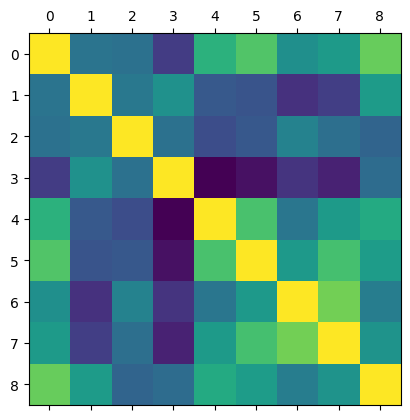

In [24]:
import matplotlib.pyplot as plt

#%matplotlib inline

plt.matshow(df_train.corr())

In [25]:

df.describe()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329
min,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783
25%,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656
50%,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516
75%,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357
max,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932


In [26]:
df.describe().loc[['mean','std']]

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
mean,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329


Linear Regression: Training, Evaluation, Feature Importance

We'll now perform linear regression on the dataset using Python's scikit-learn library. We import the library and create an instance of a Linear Regression class.


In [27]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
regr = linear_model.LinearRegression()

We must normalize our features to have mean 0 and standard deviation of 1, up to computational errors.

In [34]:
scaler = StandardScaler()
def normalize(df):
    iterator = pd.DataFrame(df.iloc[:,:-1]).items() #Will not change the response, only the predictors.
    for column,_ in iterator:
        column_data = pd.DataFrame(df[column]) # Create dataframe with a single column.
        new_column_array = scaler.fit_transform(column_data) # The scaler transforms the column.
        df[column] = pd.DataFrame(new_column_array) # Update column.
    return df

# df.head(10)
# for i in df.items():
#   print(i)
df = normalize(df)


In [32]:
df.describe().loc[['mean', 'std']]

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
mean,9.156479e-18,-9.156479e-18,-1.259016e-17,-2.346348e-17,9.156479e-18,1.831296e-17,2.518032e-17,-8.011919e-18,-4.578239e-18
std,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00,1.005195e+00


In [35]:
df_train = df[df['train']=='T']
df_test = df[df['train']=='F']

Creating the inputs and targets

Next, we separate the data into the features that we are use for inputs and the target variable that we are trying to predict (lpsa).


In [37]:
train_features = df_train.loc[:,'lcavol':'pgg45']
train_targets = df_train.loc[:,'lpsa']

test_features = df_test.loc[:,'lcavol':'pgg45']
test_targets = df_test.loc[:,'lpsa']



train_features.head(4)

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
0,-1.645861,-2.016634,-1.872101,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957
1,-1.999313,-0.725759,-0.791989,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957
2,-1.587021,-2.200154,1.368234,-1.030029,-0.525657,-0.867655,0.344407,-0.156155
3,-2.178174,-0.812191,-0.791989,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957


Training the model

Training the model is a one-line call to fit.


In [38]:
regr.fit(train_features,train_targets)

LinearRegression()

In [39]:
# Evaluating the model

# We evaluate the model using the test set, creating our target predictions. We ultimately compare the target prediction values to the true targets in the test set.

target_predict = regr.predict(test_features)




    Mean squared error represents a measure of prediction error.
    Variance score is the coefficient of prediction (R^2)



In [40]:
# The mean squared error and RSS (by hand)
print("Mean squared error: %.2f" % np.mean((target_predict - test_targets) ** 2))
print("RSS: %.2f" % np.sum((target_predict - test_targets) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(train_features, train_targets))

Mean squared error: 0.40
RSS: 11.86
Variance score: 0.69


In [41]:
mean_squared_error(target_predict,test_targets)

0.3952822383936468

In [43]:
def Z_score(X_train, y_true, y_pred, beta_hat):
    '''
    Returns the Z-scores of the model with coefficients beta_hat.
    The data is encoded in X_train and y_true:
        X_train is a (numpy) array (N, p + 1), where p is the number of predictors.
        y_true is a vector of length N.
    y_pred ia vector of length N, and is the prediction of the model on X.
    '''
    N = len(y_true)
    p = X_train.shape[1] - 1
    variance_y_est = (1/(N-p-1)) * np.sum(np.square(y_true - y_pred)) # Estimative of the variance of y.
    diag = np.diag(np.linalg.inv(np.matmul(np.transpose(X_train),X_train))) # Diagonal of (X^t X)^{-1}.
    Z = (1/np.sqrt(variance_y_est)) * np.multiply(beta_hat, np.sqrt(1/diag))
    return Z

In [44]:
# The predicted values of y on the training set.
y_pred = regr.predict(train_features)

# prepare beta
beta_hat = regr.coef_
beta_hat = np.concatenate([np.array([regr.intercept_]), beta_hat])

# prepare X
column_of_ones = np.ones((train_features.shape[0],1))
X = np.concatenate([column_of_ones, train_features], axis = 1)

# Z-scores 
columns = ['Intercept'] + train_features.columns.to_list()
Zscores = np.array([Z_score(X, train_targets.to_numpy(), y_pred, beta_hat)])
Zscores_df = pd.DataFrame(data=Zscores, columns=columns, index=['Z-score'] )
Zscores_df

,Intercept,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
Z-score,-0.150635,5.36629,2.750789,-1.395909,2.055846,2.469255,-1.866913,-0.146681,1.73784


Dropping less significant features

We can examine the intercept and coefficient values learned by the model, as below. One of the advantages of a linear regression model is that it is intepretable: larger absolute values of standardized coefficients (i.e., normalized with respect to the standard deviation) reflect higher feature importance.

First, let's have a look at the estimated coefficients.


In [46]:
print('Intercept: \n', regr.intercept_, '\nCoefficients: \n', regr.coef_)

Intercept: 
 -0.011715764309914842 
Coefficients: 
 [ 0.58867801  0.22788395 -0.12255156  0.18205082  0.26439653 -0.24992247
 -0.01845664  0.23126487]


In [47]:
train_features_small = df_train.loc[:,['lcavol','lweight','svi']]
test_features_small = df_test.loc[:,['lcavol','lweight','svi']]
regr.fit(train_features_small,train_targets)
target_predict_small = regr.predict(test_features_small)

# The mean squared error and RSS (by hand)
print("Mean squared error: %.2f" % np.mean((target_predict_small - test_targets) ** 2))
print("RSS: %.2f" % np.sum((target_predict_small - test_targets) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(train_features_small, train_targets))

Mean squared error: 0.30
RSS: 9.11
Variance score: 0.64


Mean squared error: 0.40
RSS: 11.86
Variance score: 0.69